# Practical Machine Learning Assignment #1

##### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

## Boston Housing Dataset - Predicting the Price

##### Loading the data

In [2]:
url = 'https://storage.googleapis.com/nicksdemobucket/housing-data.csv'

In [3]:
boston = pd.read_csv(url)

##### Getting a feel of the data

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


The dataset is only 47 observations, and 4 columns (`sqft`, `bdrms`, `age`, and the target variable `price`). All columns contain only integer values (no string values), and no values are missing.

In [5]:
boston.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


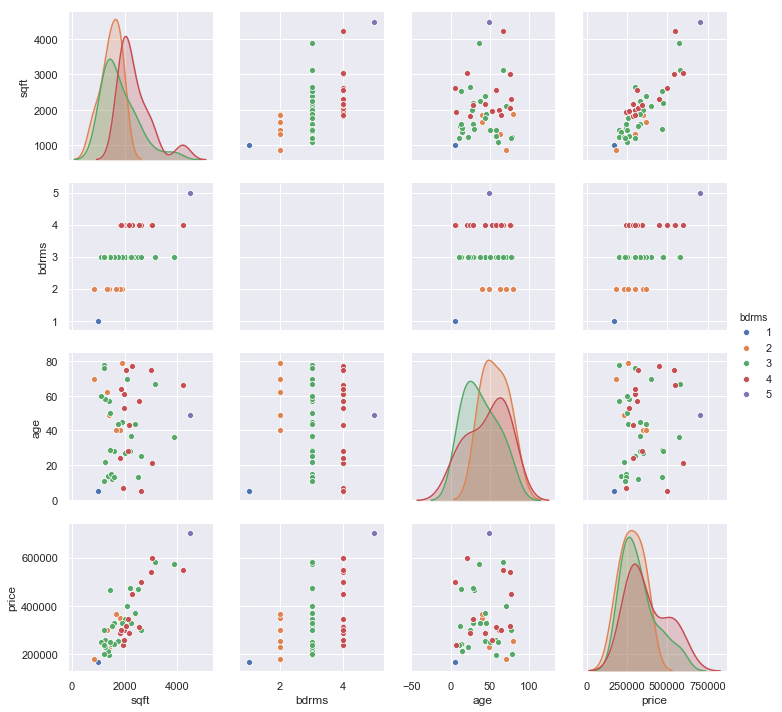

In [6]:
sns.pairplot(boston, hue='bdrms')

We can see that `price` seems correlated with `sqft` and `bdrms`, and has a right-side skew.

In [7]:
boston.corr()

,sqft,bdrms,age,price
sqft,1.000000,0.559967,0.079853,0.854988
bdrms,0.559967,1.000000,0.077486,0.442261
age,0.079853,0.077486,1.000000,0.051791
price,0.854988,0.442261,0.051791,1.000000


Let's visualize this matrix.

Text(0.5, 1.0, 'Correlation Heatmap')

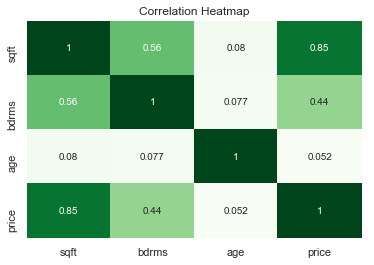

In [8]:
sns.heatmap(boston.corr(), cbar=False, cmap='Greens', annot=True)
plt.title('Correlation Heatmap')

As previously suggested, there is a relationship between `price` and `sqft` and `bdrms`.

##### Inspecting the variables 

#### `sqft`

Text(0.5, 0, 'Square feet')

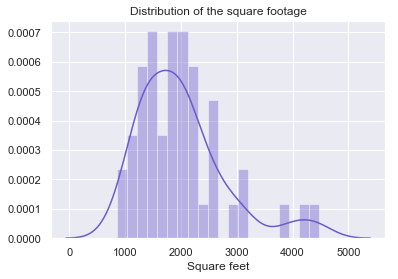

In [9]:
sns.distplot(boston['sqft'], color='slateblue', bins=20)
plt.title('Distribution of the square footage')
plt.xlabel('Square feet')

#### `bdrms`

Text(0.5, 0, 'Number of bedrooms')

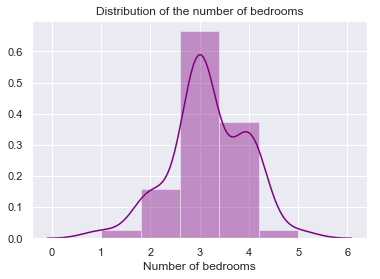

In [10]:
sns.distplot(boston['bdrms'], color='purple', bins=boston['bdrms'].value_counts().shape[0])
plt.title('Distribution of the number of bedrooms')
plt.xlabel('Number of bedrooms')

#### `age`

Text(0.5, 0, 'Age')

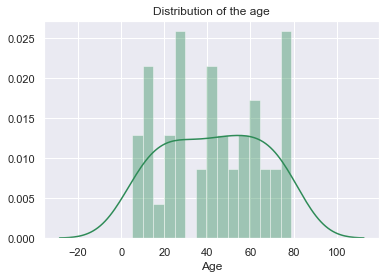

In [11]:
sns.distplot(boston['age'], color='seagreen', bins=15)
plt.title('Distribution of the age')
plt.xlabel('Age')

#### `price`

Text(0.5, 0, 'Price')

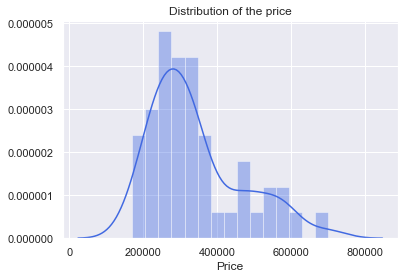

In [12]:
sns.distplot(boston['price'], color='royalblue', bins=15)
plt.title('Distribution of the price')
plt.xlabel('Price')

##### Splitting the data into train/test sets

In [13]:
X = boston.drop('price', axis=1)
y = boston['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2e-1)

### Linear Regression

In [15]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

We will compare the predictors using the `mean_absolute_error` metric

In [16]:
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mae

43041.70140932824

We will create a dataframe to visualize performance across models

In [17]:
performance = pd.DataFrame([linear_mae], index=['Linear Regression'], columns=['MAE'])

In [18]:
performance

,MAE
Linear Regression,43041.701409


Text(0.5, 1.0, 'Error From Various Models')

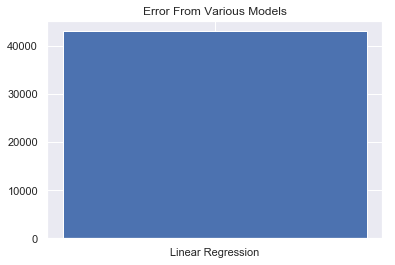

In [19]:
plt.bar(performance.index, performance.MAE)
plt.title('Error From Various Models')

#### Ridge Regression

In [20]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mean_absolute_error(y_test, y_pred)

43066.41770227694

Let's try to find optimal parameter values for the regularization parameter

In [21]:
ridge_param_grid = {'alpha':np.linspace(0.0001, 1, 100)}

In [22]:
ridge_grid = GridSearchCV(ridge, ridge_param_grid, cv=5, n_jobs=-1, iid=False, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_grid.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
ridge_mae = mean_absolute_error(y_test, ridge_grid.best_estimator_.predict(X_test))
ridge_mae

43066.41770227694

In [24]:
performance = pd.concat([performance, pd.DataFrame([ridge_mae], index=['Ridge'], columns=['MAE'])])

In [25]:
performance

,MAE
Linear Regression,43041.701409
Ridge,43066.417702


Text(0.5, 1.0, 'Error From Various Models')

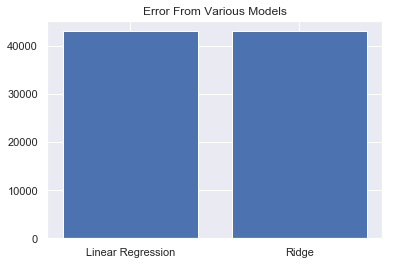

In [26]:
plt.bar(performance.index, performance['MAE'])
plt.title('Error From Various Models')

#### Lasso Regression

In [27]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mean_absolute_error(y_test, y_pred)

43042.22148345336

Let's try to find optimal parameter values for the regularization parameter

In [28]:
lasso_param_grid = {'alpha':np.linspace(0.0001, 1, 100)}

In [29]:
lasso_grid = GridSearchCV(lasso, lasso_param_grid, cv=5, n_jobs=-1, iid=False, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
lasso_grid.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
lasso_mae = mean_absolute_error(y_test, lasso_grid.best_estimator_.predict(X_test))
lasso_mae

43042.22148345336

In [31]:
performance = pd.concat([performance, pd.DataFrame([lasso_mae], index=['Lasso'], columns=['MAE'])])

In [32]:
performance

,MAE
Linear Regression,43041.701409
Ridge,43066.417702
Lasso,43042.221483


Text(0.5, 1.0, 'Error From Various Models')

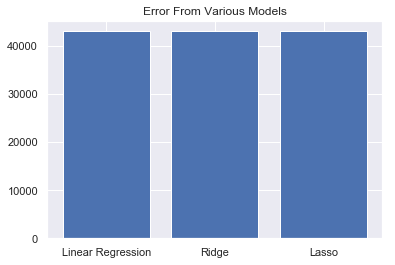

In [33]:
plt.bar(performance.index, performance['MAE'])
plt.title('Error From Various Models')

#### Decision Tree Regressor

In [34]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

65589.8

In [35]:
tree_mae = mean_absolute_error(y_test, y_pred)
tree_mae

65589.8

In [36]:
performance = pd.concat([performance, pd.DataFrame([tree_mae], index=['Decision Tree Regressor'], columns=['MAE'])])

In [37]:
performance

,MAE
Linear Regression,43041.701409
Ridge,43066.417702
Lasso,43042.221483
Decision Tree Regressor,65589.800000


Text(0.5, 1.0, 'Error From Various Models')

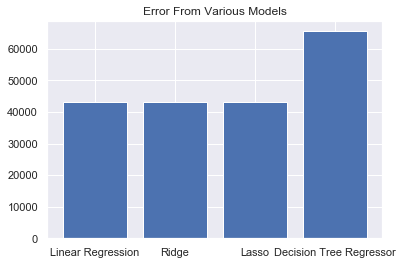

In [38]:
plt.bar(performance.index, performance['MAE'])
plt.title('Error From Various Models')

### Neural Network

#### Building the model

In [39]:
model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='linear'))

#### Compiling the model

In [40]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=['mae'])

#### Model settings

In [41]:
epochs = 10_000
batch_size = 16

#### Training the model

In [42]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test], 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5e2)], verbose=0)

In [43]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.head()

,loss,mae,val_loss,val_mae
1,99.947269,348144.87500,99.785660,310470.59375
2,99.724481,347350.43750,99.508156,309616.93750
3,99.420380,346298.50000,99.092323,308337.71875
4,98.957849,344707.03125,98.445480,306347.87500
5,98.219611,342128.78125,97.451080,303289.00000


In [44]:
start = 18
stop = history_df.shape[0]

Text(0, 0.5, 'MAPE (%)')

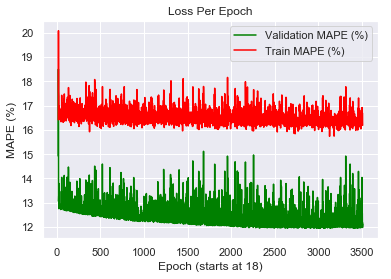

In [45]:
plt.plot(1+np.arange(start, stop), history_df['val_loss'][start:], c='green')
plt.plot(1+np.arange(start, stop), history_df['loss'][start:], c='red')
plt.legend(('Validation MAPE (%)', 'Train MAPE (%)'))
plt.title('Loss Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('MAPE (%)')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_4 (Dense)              (None, 500)               100500    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5

Final score neural net `mean_absolute_error`:

In [47]:
print('lowest validation mae: {}'.format(min(history.history['val_mae'])))

lowest validation mae: 39642.28125


In [48]:
performance = pd.concat([performance, pd.DataFrame(min(history.history['val_mae']), 
                                                   index=['Neural Network'], columns=['MAE'])])

In [49]:
performance

,MAE
Linear Regression,43041.701409
Ridge,43066.417702
Lasso,43042.221483
Decision Tree Regressor,65589.800000
Neural Network,39642.281250


Text(0.5, 1.0, 'Error From Various Models')

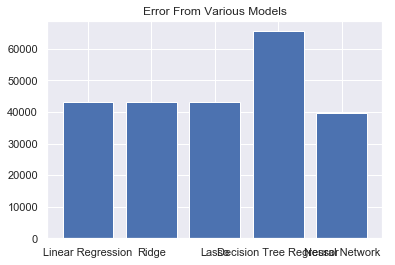

In [50]:
plt.bar(performance.index, performance['MAE'])
plt.title('Error From Various Models')

Close call

## MNIST - Classifying Hand-Written Digits

##### Loading the data

In [51]:
from sklearn.datasets import fetch_openml

##### Separating the predictors and targets

In [52]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [53]:
X.shape, y.shape

((70000, 784), (70000,))

In [54]:
y = to_categorical(y)

##### Scaling the data

In [55]:
X /= 255

##### Separating the train/test data

In [56]:
X_train = X[:60_000]
X_test = X[60_000:]
y_train = y[:60_000]
y_test = y[60_000:]

##### Building the model

In [57]:
model = Sequential()
model.add(Dense(24, input_shape=[X.shape[1]]))
model.add(Dense(36, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

##### Compiling the model

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model parameters

In [59]:
validation_split = 0.1
batch_size = 64
epochs = 1_00
patience = epochs/10 +1
monitor = 'val_accuracy'

##### Training the model

In [60]:
history = model.fit(X_train, y_train, 
                    validation_split=validation_split, 
                    verbose=0, 
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[EarlyStopping(monitor=monitor, patience=patience)])

##### Visualizing the epochs

In [61]:
print('highest validation accuracy: {}'.format(max(history.history['val_accuracy'])))
print('lowest validation loss: {}'.format(min(history.history['val_loss'])))
print('highest accuracy: {}'.format(max(history.history['accuracy'])))
print('lowest loss: {}'.format(min(history.history['loss'])))

highest validation accuracy: 0.9758333563804626
lowest validation loss: 0.08335386250913143
highest accuracy: 0.965499997138977
lowest loss: 0.10547784771797834


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                18840     
_________________________________________________________________
dense_7 (Dense)              (None, 36)                900       
_________________________________________________________________
dropout_1 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2368      
_________________________________________________________________
dense_9 (Dense)              (None, 80)                5200      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                810       
Total params: 28,118
Trainable params: 28,118
Non-trainable params: 0
__________________________________________________

In [63]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.head()

,loss,accuracy,val_loss,val_accuracy
1,0.510431,0.838519,0.186444,0.944333
2,0.281807,0.914259,0.162672,0.951500
3,0.245263,0.923556,0.140540,0.957833
4,0.221824,0.930019,0.135875,0.956167
5,0.208123,0.935185,0.143817,0.955000


In [64]:
start = 0
stop = history_df.shape[0]

Text(0, 0.5, 'Loss')

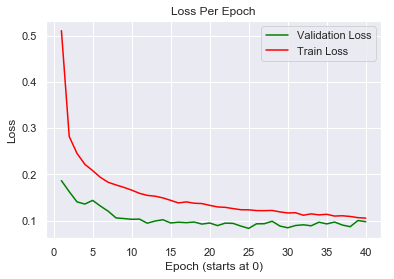

In [65]:
plt.plot(1+np.arange(start, stop), history_df['val_loss'][start:], c='green')
plt.plot(1+np.arange(start, stop), history_df['loss'][start:], c='red')
plt.legend(('Validation Loss', 'Train Loss'))
plt.title('Loss Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

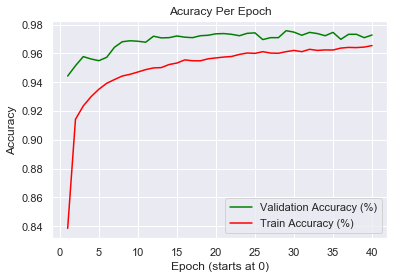

In [66]:
plt.plot(1+np.arange(start, stop), history_df['val_accuracy'][start:], 'green')
plt.plot(1+np.arange(start, stop), history_df['accuracy'][start:], c='red')
plt.legend(('Validation Accuracy (%)', 'Train Accuracy (%)'))
plt.title('Acuracy Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('Accuracy')

## Titanic - Will They Survive?

##### Getting the data

In [67]:
url = 'https://storage.googleapis.com/nicksdemobucket/titanic-train.csv'

In [68]:
titanic = pd.read_csv(url, index_col='PassengerId', na_values=['NaN'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic.shape

(891, 11)

##### Exploring the data

In [70]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We will need to make an imputation job for `Age`

In [71]:
titanic.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

First, let's get dummies

In [72]:
to_dummies = ['Embarked']
to_one_two = ['Sex']

In [73]:
for item in to_dummies:
    dummies = pd.get_dummies(titanic[item], prefix_sep=': ', prefix=item)
    titanic = titanic.drop(item, axis=1)
    titanic = pd.concat([titanic, dummies], sort=False, axis=1)
    
for item in to_one_two:
    dummies = pd.get_dummies(titanic[item], prefix_sep=': ', drop_first=True)
    titanic = titanic.drop(item, axis=1)
    titanic = pd.concat([titanic, dummies], sort=False, axis=1)

In [74]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked: C,Embarked: Q,Embarked: S,male
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,1,1
2,1,1,38.0,1,0,71.2833,1,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1,0
4,1,1,35.0,1,0,53.1000,0,0,1,0
5,0,3,35.0,0,0,8.0500,0,0,1,1


##### Imputing age with linear regression

In [75]:
to_dropna = titanic.columns.tolist()
to_dropna.remove('Age')
to_dropna

['Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked: C',
 'Embarked: Q',
 'Embarked: S',
 'male']

In [76]:
titanic_dropna = titanic.dropna(subset=to_dropna, axis=0)
test = titanic_dropna.loc[titanic_dropna.Age.isnull()].drop('Age', axis=1)
train = titanic_dropna.loc[titanic_dropna.Age.notnull()]

Test dataframe contains all passengers with missing age

In [77]:
test.shape

(177, 9)

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(train.drop('Age', axis=1), train.Age)
y_pred = np.abs(np.ceil(lin_reg.predict(test)))
y_pred[:10]

array([32., 31., 21., 28., 26., 30., 32., 26., 21., 28.])

In [79]:
titanic.loc[titanic.Age.isnull(), 'Age'] = y_pred

In [80]:
titanic.columns = titanic.columns.str.title()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
Sibsp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked: C    891 non-null uint8
Embarked: Q    891 non-null uint8
Embarked: S    891 non-null uint8
Male           891 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 52.2 KB


Now the dataset does not have any missing values! 

##### Preliminary analysis

In [81]:
titanic.corr()

,Survived,Pclass,Age,Sibsp,Parch,Fare,Embarked: C,Embarked: Q,Embarked: S,Male
Survived,1.000000,-0.338481,-0.086301,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,-0.543351
Pclass,-0.338481,1.000000,-0.397047,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.131900
Age,-0.086301,-0.397047,1.000000,-0.350000,-0.217845,0.091635,0.030046,-0.030869,-0.014445,0.115995
Sibsp,-0.035322,0.083081,-0.350000,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,-0.114631
Parch,0.081629,0.018443,-0.217845,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,-0.245489
Fare,0.257307,-0.549500,0.091635,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,-0.182333
Embarked: C,0.168240,-0.243292,0.030046,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,-0.082853
Embarked: Q,0.003650,0.221009,-0.030869,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.074115
Embarked: S,-0.155660,0.081720,-0.014445,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000,0.125722
Male,-0.543351,0.131900,0.115995,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722,1.000000


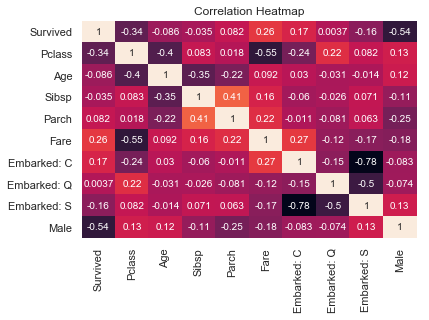

In [82]:
sns.heatmap(titanic.corr(), cbar=False, annot=True)
title = plt.title('Correlation Heatmap')

##### Preparing the data

In [83]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2e-1)

### Predicting survival

##### Logistic regression

In [85]:
logit = LogisticRegression(solver='lbfgs', max_iter=1e5)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
accuracy_score(y_test, y_pred)

0.888268156424581

##### SVM

In [86]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7597765363128491

In [87]:
svc_search = RandomizedSearchCV(svc, {'C':[0.1, 100], 'gamma':[0.000001, 10]}, n_jobs=-1, cv=5, n_iter=1e5)
svc_search.fit(X_train, y_train)
svc_search.best_estimator_

C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 4 is smaller than n_iter=100000. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-06, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
y_pred = svc_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.7039106145251397

##### Neural network

Preparing the data

In [89]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [90]:
model = Sequential([
    Dense(6, input_shape=(X_train.shape[1],)),
    Dense(12, activation='relu'),
    Dense(36, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [91]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], batch_size=5, epochs=2_00)

Train on 712 samples, validate on 179 samples
Epoch 1/200
712/712 [==============================] - 1s 941us/sample - loss: 0.6014 - accuracy: 0.7121 - val_loss: 0.4296 - val_accuracy: 0.8268
Epoch 2/200
712/712 [==============================] - 0s 310us/sample - loss: 0.5083 - accuracy: 0.7753 - val_loss: 0.3965 - val_accuracy: 0.8380
Epoch 3/200
712/712 [==============================] - 0s 286us/sample - loss: 0.4795 - accuracy: 0.7935 - val_loss: 0.3887 - val_accuracy: 0.8492
Epoch 4/200
712/712 [==============================] - 0s 287us/sample - loss: 0.4746 - accuracy: 0.7935 - val_loss: 0.3726 - val_accuracy: 0.8492
Epoch 5/200
712/712 [==============================] - 0s 293us/sample - loss: 0.4688 - accuracy: 0.7963 - val_loss: 0.3748 - val_accuracy: 0.8492
Epoch 6/200
712/712 [==============================] - 0s 279us/sample - loss: 0.4668 - accuracy: 0.7992 - val_loss: 0.3729 - val_accuracy: 0.8436
Epoch 7/200
712/712 [==============================] - 0s 308us/sample -

712/712 [==============================] - 0s 286us/sample - loss: 0.3927 - accuracy: 0.8301 - val_loss: 0.3390 - val_accuracy: 0.8827
Epoch 57/200
712/712 [==============================] - 0s 275us/sample - loss: 0.3848 - accuracy: 0.8301 - val_loss: 0.3038 - val_accuracy: 0.9050
Epoch 58/200
712/712 [==============================] - 0s 298us/sample - loss: 0.4078 - accuracy: 0.8230 - val_loss: 0.3122 - val_accuracy: 0.8994
Epoch 59/200
712/712 [==============================] - 0s 296us/sample - loss: 0.3897 - accuracy: 0.8427 - val_loss: 0.2976 - val_accuracy: 0.8994
Epoch 60/200
712/712 [==============================] - 0s 286us/sample - loss: 0.3914 - accuracy: 0.8287 - val_loss: 0.3178 - val_accuracy: 0.8994
Epoch 61/200
712/712 [==============================] - 0s 287us/sample - loss: 0.3870 - accuracy: 0.8287 - val_loss: 0.3201 - val_accuracy: 0.8883
Epoch 62/200
712/712 [==============================] - 0s 293us/sample - loss: 0.3882 - accuracy: 0.8301 - val_loss: 0.2945 

712/712 [==============================] - 0s 321us/sample - loss: 0.3624 - accuracy: 0.8469 - val_loss: 0.3594 - val_accuracy: 0.8771
Epoch 112/200
712/712 [==============================] - 0s 324us/sample - loss: 0.3676 - accuracy: 0.8455 - val_loss: 0.3541 - val_accuracy: 0.9106
Epoch 113/200
712/712 [==============================] - 0s 332us/sample - loss: 0.3484 - accuracy: 0.8427 - val_loss: 0.3795 - val_accuracy: 0.8715
Epoch 114/200
712/712 [==============================] - 0s 317us/sample - loss: 0.3657 - accuracy: 0.8329 - val_loss: 0.3671 - val_accuracy: 0.8547
Epoch 115/200
712/712 [==============================] - 0s 312us/sample - loss: 0.3705 - accuracy: 0.8272 - val_loss: 0.3277 - val_accuracy: 0.8939
Epoch 116/200
712/712 [==============================] - 0s 316us/sample - loss: 0.3482 - accuracy: 0.8441 - val_loss: 0.3546 - val_accuracy: 0.8883
Epoch 117/200
712/712 [==============================] - 0s 299us/sample - loss: 0.3451 - accuracy: 0.8483 - val_loss: 0

712/712 [==============================] - 0s 318us/sample - loss: 0.3275 - accuracy: 0.8596 - val_loss: 0.4083 - val_accuracy: 0.8883
Epoch 167/200
712/712 [==============================] - 0s 308us/sample - loss: 0.3161 - accuracy: 0.8666 - val_loss: 0.4032 - val_accuracy: 0.8771
Epoch 168/200
712/712 [==============================] - 0s 324us/sample - loss: 0.3330 - accuracy: 0.8525 - val_loss: 0.4157 - val_accuracy: 0.8827
Epoch 169/200
712/712 [==============================] - 0s 372us/sample - loss: 0.3304 - accuracy: 0.8694 - val_loss: 0.4097 - val_accuracy: 0.8771
Epoch 170/200
712/712 [==============================] - 0s 368us/sample - loss: 0.3620 - accuracy: 0.8301 - val_loss: 0.4490 - val_accuracy: 0.8827
Epoch 171/200
712/712 [==============================] - 0s 339us/sample - loss: 0.3532 - accuracy: 0.8511 - val_loss: 0.4488 - val_accuracy: 0.8883
Epoch 172/200
712/712 [==============================] - 0s 300us/sample - loss: 0.3447 - accuracy: 0.8525 - val_loss: 0

In [93]:
print('highest validation accuracy: {}'.format(max(history.history['val_accuracy'])))
print('lowest validation loss: {}'.format(min(history.history['val_loss'])))
print('highest accuracy: {}'.format(max(history.history['accuracy'])))
print('lowest loss: {}'.format(min(history.history['loss'])))

highest validation accuracy: 0.910614550113678
lowest validation loss: 0.29336122315189694
highest accuracy: 0.8834269642829895
lowest loss: 0.3018204851777115


In [94]:
history_df = pd.DataFrame(history.history)
history_df.index += 1
history_df.head()

,loss,accuracy,val_loss,val_accuracy
1,0.601373,0.712079,0.429647,0.826816
2,0.508308,0.775281,0.396498,0.837989
3,0.479467,0.793539,0.388675,0.849162
4,0.474573,0.793539,0.372621,0.849162
5,0.468765,0.796348,0.374812,0.849162


In [95]:
start = 0
stop = history_df.shape[0]

Text(0, 0.5, 'Loss')

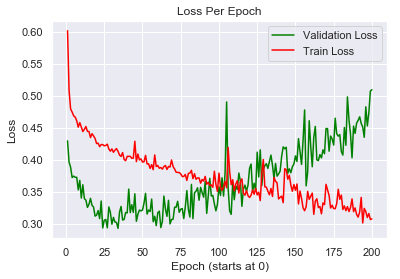

In [96]:
plt.plot(1+np.arange(start, stop), history_df['val_loss'][start:], c='green')
plt.plot(1+np.arange(start, stop), history_df['loss'][start:], c='red')
plt.legend(('Validation Loss', 'Train Loss'))
plt.title('Loss Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('Loss')

This is what we call a typical overfitting pattern

Text(0, 0.5, 'Accuracy')

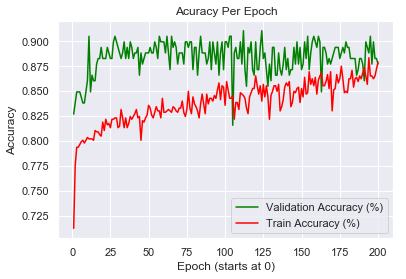

In [97]:
plt.plot(1+np.arange(start, stop), history_df['val_accuracy'][start:], 'green')
plt.plot(1+np.arange(start, stop), history_df['accuracy'][start:], c='red')
plt.legend(('Validation Accuracy (%)', 'Train Accuracy (%)'))
plt.title('Acuracy Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('Accuracy')

Once again, the neural network is the most accurate